# Stacking

In [1]:
# Imports
import io
import requests
import time

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load dataset

url = 'https://raw.githubusercontent.com/rrsr28/Sign-Language-Recognition/main/Dataset.csv'
#Raw url: 'https://github.com/rrsr28/Sign-Language-Recognition/blob/main/Dataset.csv'

data = pd.read_csv(url)
print((len(data.columns)))

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Preprocessing

X = np.array(X)
y = np.array(y)

original_labels = np.unique(y)

encoder = LabelEncoder()
y = encoder.fit_transform(y) # Convert labels to numerical values

numerical_labels = np.unique(y)

for i in np.arange(len(original_labels)):
  print(f'{numerical_labels[i]}: Original label {original_labels[i]}')

64
0: Original label A
1: Original label B
2: Original label C
3: Original label D
4: Original label E
5: Original label F
6: Original label G
7: Original label H
8: Original label I
9: Original label J
10: Original label K
11: Original label L
12: Original label M
13: Original label N
14: Original label No Hand Detected
15: Original label O
16: Original label P
17: Original label Q
18: Original label R
19: Original label S
20: Original label T
21: Original label U
22: Original label V
23: Original label W
24: Original label X
25: Original label Y
26: Original label Z


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

eval = []

In [3]:
# Logistic Regression model
# best params: (C=4.5, max_iter=1000, solver='sag')

print("Logistic Regression ...", end=" ")

# Train
t0 = time.time()
logreg_model = LogisticRegression(C=4.5, solver='sag', verbose=2, max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_train_time = time.time() - t0

# Predict
t0 = time.time()
logreg_pred = logreg_model.predict(X_test)
logreg_pred_time = time.time() - t0

y_pred_1 = logreg_model.predict_proba(X_test)

# Evaluate
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average="weighted")
logreg_recall = recall_score(y_test, logreg_pred, average="weighted")
logreg_f1 = f1_score(y_test, logreg_pred, average="weighted")

logreg_dict = {
    "model_name": type(logreg_model).__name__,
    "train_time": logreg_train_time,
    "predict_time": logreg_pred_time,
    "accuracy": logreg_accuracy,
    "precision": logreg_precision,
    "recall": logreg_recall,
    "f1": logreg_f1,
}

eval.append(logreg_dict)

print("Done")

Logistic Regression ... Epoch 1, change: 1.00000000
Epoch 2, change: 0.40557156
Epoch 3, change: 0.18968568
Epoch 4, change: 0.10087519
Epoch 5, change: 0.06443410
Epoch 6, change: 0.06071062
Epoch 7, change: 0.04534245
Epoch 8, change: 0.03706972
Epoch 9, change: 0.03121517
Epoch 10, change: 0.02730776
Epoch 11, change: 0.02383652
Epoch 12, change: 0.02169917
Epoch 13, change: 0.01953373
Epoch 14, change: 0.01739369
Epoch 15, change: 0.01556716
Epoch 16, change: 0.01406843
Epoch 17, change: 0.01286725
Epoch 18, change: 0.01170768
Epoch 19, change: 0.01073343
Epoch 20, change: 0.00978853
Epoch 21, change: 0.00903859
Epoch 22, change: 0.00830131
Epoch 23, change: 0.00762008
Epoch 24, change: 0.00701115
Epoch 25, change: 0.00650200
Epoch 26, change: 0.00598175
Epoch 27, change: 0.00550454
Epoch 28, change: 0.00515234
Epoch 29, change: 0.00475649
Epoch 30, change: 0.00442480
Epoch 31, change: 0.00416016
Epoch 32, change: 0.00385738
Epoch 33, change: 0.00358454
Epoch 34, change: 0.00333441

In [4]:
print(y_pred_1)

[[2.25248920e-03 5.79359493e-04 2.41465551e-02 ... 1.06310886e-03
  1.74834731e-02 7.01675568e-03]
 [4.28996444e-03 5.97028252e-03 7.91303175e-04 ... 1.53844019e-02
  7.94692214e-04 1.18991283e-02]
 [7.37104118e-05 1.68051158e-06 2.57372540e-04 ... 4.66423673e-03
  2.02063123e-02 5.02901288e-01]
 ...
 [8.95629571e-03 2.06968420e-05 1.59433260e-04 ... 5.49492438e-01
  7.23155447e-03 1.46846971e-02]
 [6.73535168e-03 4.25387486e-07 2.98695579e-05 ... 3.19136395e-03
  9.87910136e-02 1.66324418e-03]
 [1.75472708e-03 1.85803504e-02 9.54611354e-03 ... 3.03711242e-02
  3.52770066e-04 4.21331947e-03]]


In [3]:
# SVM model
# best params: SVC(C=0.08, degree=6, kernel='poly', max_iter=1000)

print("Logistic Regression ...", end=" ")

# Train
t0 = time.time()
svc_model = SVC(C=0.8, degree=6, kernel='poly', verbose=2, probability=True, max_iter=1000)
svc_model.fit(X_train, y_train)
svc_train_time = time.time() - t0

# Predict
t0 = time.time()
svc_pred = svc_model.predict(X_test)
svc_pred_time = time.time() - t0

y_pred_2 = svc_model.predict_proba(X_test)

# Evaluate
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred, average="weighted")
svc_recall = recall_score(y_test, svc_pred, average="weighted")
svc_f1 = f1_score(y_test, svc_pred, average="weighted")

svc_dict = {
    "model_name": str(type(svc_model).__name__),
    "train_time": svc_train_time,
    "predict_time": svc_pred_time,
    "accuracy": svc_accuracy,
    "precision": svc_precision,
    "recall": svc_recall,
    "f1": svc_f1,
}

eval.append(svc_dict)

print("Done")

Logistic Regression ... [LibSVM]*
optimization finished, #iter = 52
obj = -5.770904, rho = 0.787222
nSV = 15, nBSV = 10
Total nSV = 15
*
optimization finished, #iter = 66
obj = -5.606500, rho = 0.698856
nSV = 15, nBSV = 9
Total nSV = 15
*
optimization finished, #iter = 71
obj = -5.096111, rho = 0.322645
nSV = 14, nBSV = 9
Total nSV = 14
*
optimization finished, #iter = 69
obj = -5.518267, rho = 0.962039
nSV = 13, nBSV = 10
Total nSV = 13
*
optimization finished, #iter = 282
obj = -3.594291, rho = 0.999476
nSV = 13, nBSV = 5
Total nSV = 13
*
optimization finished, #iter = 63
obj = -5.824882, rho = -0.851503
nSV = 14, nBSV = 10
..WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -7.104773, rho = 0.855721
nSV = 21, nBSV = 11
Total nSV = 21
*
optimization finished, #iter = 355
obj = -7.345706, rho = 0.834946
nSV = 21, nBSV = 12
Total nSV = 21
*
optimization finished, #iter = 181
obj = -7.233221, rho = 0.660380
nSV = 19, nBSV = 12
Total nSV = 19
*
optimization f

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Done


In [6]:
print(y_pred_2)

[[2.05291226e-03 3.66791497e-03 1.16866424e-02 ... 2.20687428e-03
  7.43795779e-03 1.42234995e-03]
 [7.80925247e-03 1.29200843e-02 7.76001961e-03 ... 1.40261030e-02
  2.82967628e-03 6.40402097e-03]
 [2.43255263e-04 1.47448796e-04 2.63958435e-04 ... 8.91593398e-04
  1.09544626e-03 5.94734802e-03]
 ...
 [4.90374247e-03 7.18741389e-04 1.07645048e-03 ... 8.77943852e-01
  5.10633424e-03 8.11744504e-03]
 [1.12415632e-04 4.50742637e-05 9.83120993e-05 ... 7.47906915e-05
  4.84791945e-04 9.76036652e-05]
 [3.24139153e-04 7.13340300e-04 1.43451421e-03 ... 4.09403170e-04
  2.07301175e-04 4.86182308e-04]]


In [7]:
eval_df = pd.DataFrame(eval)
eval_df

,model_name,train_time,predict_time,accuracy,precision,recall,f1
0,LogisticRegression,6.270205,0.019346,0.917500,0.926629,0.917500,0.917850
1,SVC,4.404245,0.186147,0.959375,0.969772,0.959375,0.962255


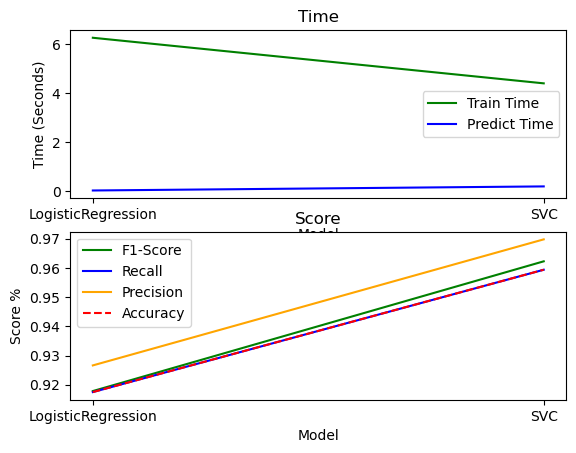

In [8]:
# Visualisation

from matplotlib import pyplot as plt

plt.subplot(2, 1, 1)
plt.title("Time")
plt.plot(eval_df["model_name"], eval_df["train_time"], "g", label="Train Time")
plt.plot(eval_df["model_name"], eval_df["predict_time"], "b", label="Predict Time")


plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score")
plt.plot(eval_df["model_name"], eval_df["f1"], "g", label="F1-Score")
plt.plot(eval_df["model_name"], eval_df["recall"], "b", label="Recall")
plt.plot(eval_df["model_name"], eval_df["precision"], "orange", label="Precision")
plt.plot(eval_df["model_name"], eval_df["accuracy"], "r--", label="Accuracy")
plt.xlabel("Model")
plt.ylabel("Score %")
plt.legend()
plt.show()

In [5]:
#Stacking

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('lr', LogisticRegression(C=4.5, solver='sag', verbose=2, max_iter=1000)),
    ('svc', SVC(C=0.8, degree=6, kernel='poly', verbose=2, probability=True, max_iter=1000))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier()
)

clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)
print(classification_report(clf_pred, y_test))

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41356008
Epoch 3, change: 0.20792281
Epoch 4, change: 0.11541254
Epoch 5, change: 0.07156539
Epoch 6, change: 0.05228433
Epoch 7, change: 0.04577395
Epoch 8, change: 0.03597350
Epoch 9, change: 0.03195205
Epoch 10, change: 0.02685557
Epoch 11, change: 0.02497259
Epoch 12, change: 0.02186183
Epoch 13, change: 0.01851019
Epoch 14, change: 0.01760665
Epoch 15, change: 0.01541508
Epoch 16, change: 0.01404737
Epoch 17, change: 0.01295116
Epoch 18, change: 0.01186171
Epoch 19, change: 0.01067369
Epoch 20, change: 0.00978479
Epoch 21, change: 0.00896430
Epoch 22, change: 0.00828389
Epoch 23, change: 0.00758524
Epoch 24, change: 0.00692624
Epoch 25, change: 0.00647852
Epoch 26, change: 0.00599823
Epoch 27, change: 0.00549811
Epoch 28, change: 0.00512859
Epoch 29, change: 0.00473845
Epoch 30, change: 0.00441919
Epoch 31, change: 0.00412172
Epoch 32, change: 0.00379747
Epoch 33, change: 0.00357936
Epoch 34, change: 0.00332301
Epoch 35, change: 0.003

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.40012046
Epoch 3, change: 0.23940094
Epoch 4, change: 0.13657577
Epoch 5, change: 0.07691672
Epoch 6, change: 0.05246391
Epoch 7, change: 0.04334761
Epoch 8, change: 0.03853029
Epoch 9, change: 0.03209781
Epoch 10, change: 0.03007502
Epoch 11, change: 0.02417008
Epoch 12, change: 0.02209685
Epoch 13, change: 0.01991102
Epoch 14, change: 0.01801438
Epoch 15, change: 0.01575535
Epoch 16, change: 0.01472164
Epoch 17, change: 0.01336936
Epoch 18, change: 0.01187729
Epoch 19, change: 0.01090191
Epoch 20, change: 0.00996479
Epoch 21, change: 0.00921690
Epoch 22, change: 0.00839519
Epoch 23, change: 0.00766946
Epoch 24, change: 0.00710238
Epoch 25, change: 0.00651078
Epoch 26, change: 0.00609172
Epoch 27, change: 0.00562001
Epoch 28, change: 0.00513236
Epoch 29, change: 0.00476506
Epoch 30, change: 0.00444251
Epoch 31, change: 0.00410950
Epoch 32, change: 0.00383090
Epoch 33, change: 0.00356130
Epoch 34, change: 0.00331650
Epoch 35, change: 0.003

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 120
obj = -5.165243, rho = 0.974370
nSV = 14, nBSV = 9
Total nSV = 14
*
optimization finished, #iter = 64
obj = -4.945596, rho = 0.850268
nSV = 13, nBSV = 7
Total nSV = 13
*
optimization finished, #iter = 52
obj = -4.987242, rho = 0.369071
nSV = 14, nBSV = 9
Total nSV = 14
*
optimization finished, #iter = 59
obj = -5.491074, rho = 0.701107
nSV = 16, nBSV = 9
Total nSV = 16
*
optimization finished, #iter = 83
obj = -5.394975, rho = 0.985030
nSV = 16, nBSV = 9
Total nSV = 16
*
optimization finished, #iter = 59
obj = -5.790782, rho = -0.849489
nSV = 14, nBSV = 10
.*
optimization finished, #iter = 562
obj = -4.635403, rho = 0.999815
nSV = 15, nBSV = 7
Total nSV = 15
.*.*
optimization finished, #iter = 639
obj = -4.565234, rho = 0.999519
nSV = 17, nBSV = 7
Total nSV = 17
*
optimization finished, #iter = 260
obj = -4.677762, rho = 0.834538
nSV = 16, nBSV = 8
Total nSV = 16
.*.*
optimization finished, #iter = 822
obj = -4.637512, rho = 0.994074
nSV = 1

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 286
obj = -4.453053, rho = 0.999223
nSV = 13, nBSV = 6
Total nSV = 13
*
optimization finished, #iter = 279
obj = -4.453054, rho = 0.999432
nSV = 13, nBSV = 6
Total nSV = 13
.
*.*
optimization finished, #iter = 747
obj = -3.311550, rho = 0.999420
nSV = 13, nBSV = 4
Total nSV = 13
*
optimization finished, #iter = 74
obj = -3.469633, rho = 0.817416
nSV = 11, nBSV = 5
Total nSV = 11
.*
optimization finished, #iter = 412
obj = -4.448068, rho = 0.999459
nSV = 14, nBSV = 6
Total nSV = 14
*
optimization finished, #iter = 157
obj = -4.453053, rho = -1.000644
nSV = 13, nBSV = 6
.*
optimization finished, #iter = 549
obj = -6.728421, rho = 0.872986
nSV = 18, nBSV = 11
Total nSV = 18
.*.*
optimization finished, #iter = 625
obj = -5.475826, rho = 0.999495
nSV = 17, nBSV = 9
Total nSV = 17
*.*
optimization finished, #iter = 544
obj = -7.073291, rho = 0.780840
nSV = 18, nBSV = 10
Total nSV = 18
*
optimization finished, #iter = 145
obj = -6.428308, rho = 0.73814

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]*
optimization finished, #iter = 142
obj = -4.215284, rho = 0.037481
nSV = 14, nBSV = 7
Total nSV = 14
*
optimization finished, #iter = 78
obj = -4.127169, rho = -0.014508
nSV = 13, nBSV = 7
Total nSV = 13
*
optimization finished, #iter = 141
obj = -4.326388, rho = -0.017022
nSV = 14, nBSV = 6
Total nSV = 14
*
optimization finished, #iter = 69
obj = -4.429294, rho = 0.246680
nSV = 13, nBSV = 7
Total nSV = 13
*
optimization finished, #iter = 117
obj = -3.527348, rho = 0.674608
nSV = 13, nBSV = 4
Total nSV = 13
*
optimization finished, #iter = 53
obj = -4.550231, rho = -0.139235
nSV = 13, nBSV = 7
*
optimization finished, #iter = 91
obj = -6.949663, rho = 0.475947
nSV = 19, nBSV = 11
Total nSV = 19
*
optimization finished, #iter = 96
obj = -4.927110, rho = 0.751348
nSV = 16, nBSV = 9
Total nSV = 16
*
optimization finished, #iter = 118
obj = -6.408754, rho = 0.587931
nSV = 18, nBSV = 11
Total nSV = 18
*
optimization finished, #iter = 161
obj = -6.955483, rho = 0.536124
nSV = 18, n

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]*.*
optimization finished, #iter = 406
obj = -4.436871, rho = 0.999402
nSV = 14, nBSV = 7
Total nSV = 14
*
optimization finished, #iter = 62
obj = -4.890496, rho = 0.086387
nSV = 14, nBSV = 8
Total nSV = 14
.*
optimization finished, #iter = 371
obj = -4.780005, rho = 0.946344
nSV = 16, nBSV = 8
Total nSV = 16
*.*
optimization finished, #iter = 358
obj = -4.304204, rho = 0.999557
nSV = 14, nBSV = 5
Total nSV = 14
*
optimization finished, #iter = 44
obj = -5.236523, rho = 0.707808
nSV = 14, nBSV = 9
Total nSV = 14
*
optimization finished, #iter = 161
obj = -5.434055, rho = -0.940046
nSV = 17, nBSV = 10
*.*
optimization finished, #iter = 394
obj = -7.089208, rho = 0.825455
nSV = 20, nBSV = 11
Total nSV = 20
*
optimization finished, #iter = 129
obj = -7.198352, rho = 0.589047
nSV = 19, nBSV = 12
Total nSV = 19
*.*
optimization finished, #iter = 606
obj = -7.425733, rho = 0.839308
nSV = 22, nBSV = 11
Total nSV = 22
*
optimization finished, #iter = 243
obj = -6.915823, rho = 0.900914

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      0.98      0.99        61
           5       1.00      1.00      1.00        60
           6       1.00      0.97      0.98        62
           7       0.92      1.00      0.96        55
           8       0.97      1.00      0.98        58
           9       1.00      1.00      1.00        60
          10       0.95      0.98      0.97        58
          11       0.93      1.00      0.97        56
          12       0.98      1.00      0.99        59
          13       0.97      1.00      0.98        58
          14       0.90      0.51      0.65        70
          15       0.93      1.00      0.97        56
          16       1.00      1.00      1.00        60
          17       1.00    

In [7]:
# Save model

import pickle

with open('models/meta.pkl', 'wb') as f:
    pickle.dump(clf, f)

### Test meta model

In [ ]:
# Run test with MediaPipe

import cv2
import mediapipe as mp
import numpy as np
import pickle

file_name = 'models/meta.pkl'

#hand.py
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)
with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:

            for hand_landmarks in results.multi_hand_landmarks:
                handIndex = results.multi_hand_landmarks.index(hand_landmarks)
                handLabel = results.multi_handedness[handIndex].classification[0].label

                handLandmarks = []
                for landmarks in hand_landmarks.landmark:
                    handLandmarks.append([landmarks.x, landmarks.y, landmarks.z])

                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
                
                # Load model
                with open(file_name, 'rb') as f:
                    model = pickle.load(f)
                  
                    # Predict
                    X_frame = np.array(handLandmarks)
                    X_frame = np.ravel(X_frame)

                    predict = model.predict([X_frame])
                    # Display Text
                    pt_x = 50
                    pt_y = 70
                    pt_h = 30
                    color = (130,255,0)
                    text_top = 'Predicted ASL Letter'
                    text_bottom = f'Letter: {original_labels[predict]}'
                    cv2.putText(image, text_top, (pt_x, pt_y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, thickness=1)
                    cv2.putText(image, text_bottom, (pt_x, pt_y+25+pt_h), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, thickness=2)


                    print(f'Predicted Letter: {original_labels[predict]}')


        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()

2024-11-10 03:29:57.829857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 03:29:57.849836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 03:29:57.856820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 03:29:57.872382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
libEGL warning: MESA-LOADER: failed

Predicted Letter: ['C']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['L']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['L']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['L']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['Z']
Predicted Letter: ['J']
Predicted Letter: ['D']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['L']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['J']
Predicted Letter: ['D']
Predicted Letter: ['L']
Predicted Letter: ['J']
Predicted Letter: ['L']
Predicted Letter: ['L']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter: ['D']
Predicted Letter

: 

### D
![Screenshot from 2024-11-10 03-33-32.png](<attachment:Screenshot from 2024-11-10 03-33-32.png>) 

### S
![Screenshot from 2024-11-10 03-35-43.png](<attachment:Screenshot from 2024-11-10 03-35-43.png>)

### I
![Screenshot from 2024-11-10 03-37-10.png](<attachment:Screenshot from 2024-11-10 03-37-10.png>)
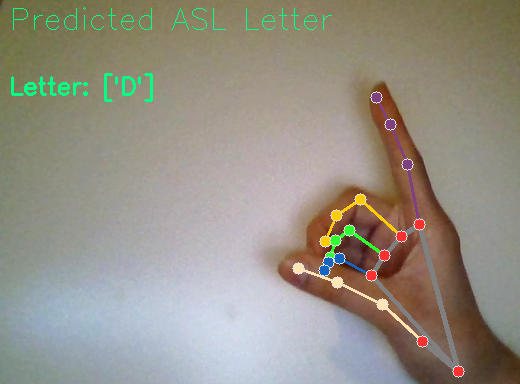
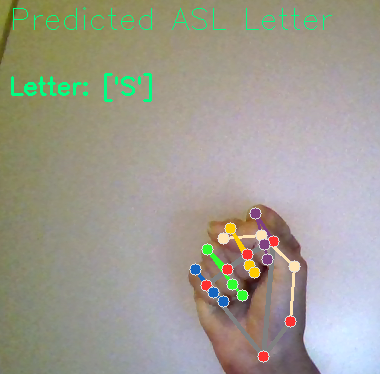
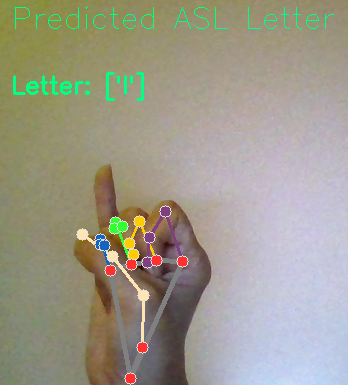